In [13]:
import sys
import os
from pyneuroml import pynml
from pyneuroml.pynml import print_comment_v
from pyneuroml.lems import LEMSSimulation
import neuroml as nml
import neuroml.writers as writers
import random
random.seed(12345)

In [20]:
#Create NeuroML file

nml_doc = nml.NeuroMLDocument(id="net")

#Include cell file
incl = nml.IncludeType(href="C51A_scaled_exp_resample_5.cell.nml")
nml_doc.includes.append(incl)

#Create network
net = nml.Network(id="net", type="networkWithTemperature", temperature="20degC")
nml_doc.networks.append(net)

#Create population
pop = nml.Population(id="pop24", component="C51A", type="populationList", size="1")
net.populations.append(pop)

loc = nml.Location(x="0", y="800", z="0")

inst = nml.Instance(id="0", location=loc)
pop.instances.append(inst)

#Create pulse generator
pg = nml.PulseGenerator(id="iclamp0", delay="500ms", duration="200ms", amplitude="-1nA")
nml_doc.pulse_generators.append(pg)

#Add pg to cell
il = nml.InputList(id="clamps", component=pg.id, populations="pop24")
ip = nml.Input(id="0", target="../pop24/0/C51A", segmentId="0", destination="synapses")
il.input.append(ip)
net.input_lists.append(il)

nml_file = "nml_C51A.net.nml"
writers.NeuroMLWriter.write(nml_doc, nml_file)

print("Written network file to: "+nml_file)

from neuroml.utils import validate_neuroml2
validate_neuroml2(nml_file)

ref = "Test"
sim_id = "Vm_%s"%ref
sim_dur_ms = 100
dt = 0.05
quantity = "pop24/0/C51A/0/v"
target = 'net'

ls = LEMSSimulation(sim_id, sim_dur_ms, dt, target = target)
ls.include_neuroml2_file("nml_C51A.net.nml")
#ls.assign_simulation_target('net')

disp0 = 'display0'
ls.create_display(disp0, "Spiking pattern", "-90", "50")
ls.add_line_to_display(disp0, 'v', quantity)

of0 = 'Volts_file'
ls.create_output_file(of0, "%s.v.dat"%sim_id)
ls.add_column_to_output_file(of0, 'v', quantity)

fn = "LEMS_%s.xml"%sim_id
ls.save_to_file(file_name=fn)

example_lems_file = '/home/jovyan/work/NeuroML_Examples/Naomi/LEMS_Vm_Test.xml'

out_dir,rel_filename = os.path.split(example_lems_file)
print(out_dir)
print(rel_filename)

results_dict = pynml.run_lems_with_jneuroml_neuron(
    rel_filename, verbose=False, nogui=True, load_saved_data=True, exec_in_dir=out_dir,
    max_memory='400M')

print( results_dict.keys() )
print( 'Recorded points: ', len(results_dict['t']) )
# You can also sort the entries in the dict, for predictable results.
# dict has started being sorted in newer Python versions, but just make sure.
# results_dict = OrderedDict(sorted(results_dict.items()))

Written network file to: nml_C51A.net.nml
Validating nml_C51A.net.nml against /opt/conda/lib/python3.7/site-packages/neuroml/nml/NeuroML_v2.1.xsd
It's valid!
pyNeuroML >>> Written LEMS Simulation Vm_Test to file: LEMS_Vm_Test.xml
/home/jovyan/work/NeuroML_Examples/Naomi
LEMS_Vm_Test.xml
pyNeuroML >>> Reloading data specified in LEMS file: LEMS_Vm_Test.xml (/home/jovyan/work/NeuroML_Examples/Naomi/LEMS_Vm_Test.xml), base_dir: /home/jovyan/work/NeuroML_Examples/Naomi, cwd: /home/jovyan/work/NeuroML_Examples/Naomi
dict_keys(['t', 'pop24/0/C51A/0/v'])
Recorded points:  2001


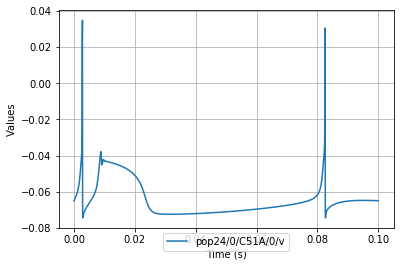

In [19]:
import matplotlib
import matplotlib.pyplot as plt

plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.grid(True)

# plt.gca().clear()

for key in results_dict:
    if key == 't':
        # no need to plot sim time against sim time
        continue
    plt.plot(results_dict['t'],results_dict[key], label=""+key)
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.show()